# Setup Notebook

In [172]:
import IPython
import numpy as np
import pandas as pd
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import auc, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import random

# Data Preparation

In [173]:
msg_df = pd.read_csv('spam.csv', encoding='cp1252')
msg_df = msg_df.drop(msg_df.columns[[2, 3, 4]], axis=1)

In [174]:
msg_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
# converting label to 0s and 1s 
for index, row in msg_df.iterrows():
        if row["v1"] == "ham":
            row["v1"] = 0
        else:
            row["v1"] = 1

In [176]:
msg_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [177]:
# split data into feature and labels
label = msg_df['v1']
feature = msg_df['v2']

In [178]:
# split the data into training and testing (30% split)
train_feature, test_feature, train_label, test_label = train_test_split(feature, label, test_size = 0.3)

# uses TF-IDF to identify the features we will be using
cv = TfidfVectorizer(min_df = 1, stop_words="english")
train_feat_cv = cv.fit_transform(train_feature).toarray()
train_label = train_label.astype('int')

test_feat_cv = cv.transform(test_feature).toarray()
test_label = test_label.astype('int')

# Create a Model Using Gaussian Naives Bayes Classifier

In [179]:
k_fold = KFold(len(train_feat_cv), n_folds=7, shuffle=True, random_state=0)
k_fold_test = KFold(len(test_feat_cv), n_folds=7, shuffle=True, random_state=0)

In [180]:
gnb = GaussianNB()
print(cross_val_score(gnb, train_feat_cv, train_label, cv=k_fold, n_jobs=1))

[0.90143369 0.89228007 0.89048474 0.86714542 0.88509874 0.87612208
 0.87791741]


In [181]:
gnb_predictions = cross_val_predict(gnb, test_feat_cv, test_label)
print(cross_val_score(gnb, gnb_predictions.reshape(-1, 1), test_label, cv=k_fold_test, n_jobs=1))

[0.88702929 0.86610879 0.85774059 0.83263598 0.86192469 0.87866109
 0.91176471]


In [182]:
accuracy_score(test_label, gnb_predictions)

0.8708133971291866

In [183]:
gnb.fit(test_feat_cv, test_label)
gnb_pred_proba = gnb.predict_proba(test_feat_cv)[:, 1]

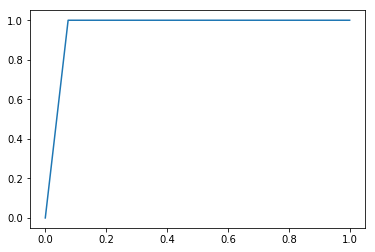

In [184]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_label, gnb_pred_proba)
plt.plot(fpr, tpr)

In [185]:
print(roc_auc_score(test_label, gnb_predictions))

0.8519894282652487


# Create a Model Using Random Forrest Classifier

In [186]:
rf = RandomForestClassifier()
print(cross_val_score(rf, train_feat_cv, train_label, cv=k_fold, n_jobs=1))

[0.98207885 0.96588869 0.97307002 0.96409336 0.96588869 0.9551167
 0.96947935]


In [187]:
rf_predictions = cross_val_predict(rf, test_feat_cv, test_label)
print(cross_val_score(rf, rf_predictions.reshape(-1, 1), test_label, cv=k_fold_test, n_jobs=1))

[0.94142259 0.92468619 0.958159   0.94560669 0.9539749  0.93305439
 0.96218487]


In [188]:
accuracy_score(test_label, rf_predictions)

0.9455741626794258

In [189]:
rf.fit(test_feat_cv, test_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [190]:
rf_pred_proba = rf.predict_proba(test_feat_cv)[:, 1]

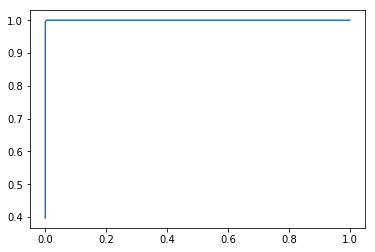

In [191]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_label, rf_pred_proba)
plt.plot(fpr, tpr)

In [192]:
print(roc_auc_score(test_label, rf_pred_proba))

0.9999905721747164


# Create a Model Using Logistic Regression

In [193]:
lr = LogisticRegression()
print(cross_val_score(lr, train_feat_cv, train_label, cv=k_fold, n_jobs=1))

[0.95340502 0.93716338 0.9497307  0.91921005 0.93716338 0.92818671
 0.94793537]


In [194]:
lr_predictions = cross_val_predict(lr, test_feat_cv, test_label)
print(cross_val_score(lr, lr_predictions.reshape(-1, 1), test_label, cv=k_fold_test, n_jobs=1))

[0.87866109 0.89958159 0.89121339 0.90376569 0.90794979 0.87866109
 0.90756303]


In [195]:
accuracy_score(test_label, lr_predictions)

0.8953349282296651

In [196]:
print(test_label.values[15:25])
print(lr_predictions[15:25])

[0 0 0 0 0 0 1 0 0 1]
[0 0 0 0 0 0 1 0 0 0]


In [197]:
lr.fit(test_feat_cv, test_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [198]:
lr.predict_proba(test_feat_cv[:10, :])

array([[0.55690869, 0.44309131],
       [0.84655761, 0.15344239],
       [0.93949594, 0.06050406],
       [0.89100659, 0.10899341],
       [0.92316064, 0.07683936],
       [0.95150614, 0.04849386],
       [0.94807697, 0.05192303],
       [0.24214118, 0.75785882],
       [0.89781914, 0.10218086],
       [0.92368808, 0.07631192]])

In [204]:
test_pred_prob = lr.predict_proba(test_feat_cv)[:, 1]
test_pred_prob

array([0.44309131, 0.15344239, 0.06050406, ..., 0.04961229, 0.06609836,
       0.05729228])

In [206]:
stuff = lr.predict(test_feat_cv)
stuff

array([0, 0, 0, ..., 0, 0, 0])

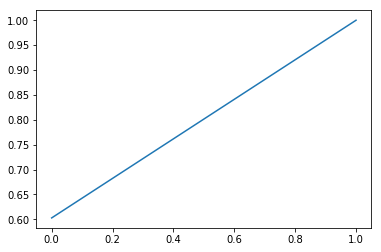

In [207]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_label, stuff)
plt.plot(fpr, tpr)

In [203]:
from sklearn.metrics import auc, roc_auc_score
print(roc_auc_score(test_label, test_pred_prob))

0.9989566540019547


# Performance Comparision

In [106]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, gnb_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.849286083259381


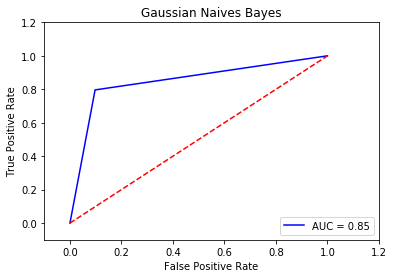

In [107]:
plt.title('Gaussian Naives Bayes')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, rf_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.7766990291262136


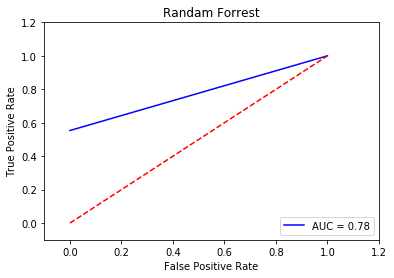

In [109]:
plt.title('Randam Forrest')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, lr_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.5946601941747572


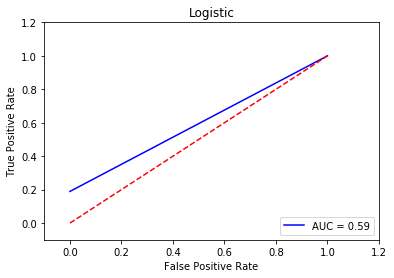

In [111]:
plt.title('Logistic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()